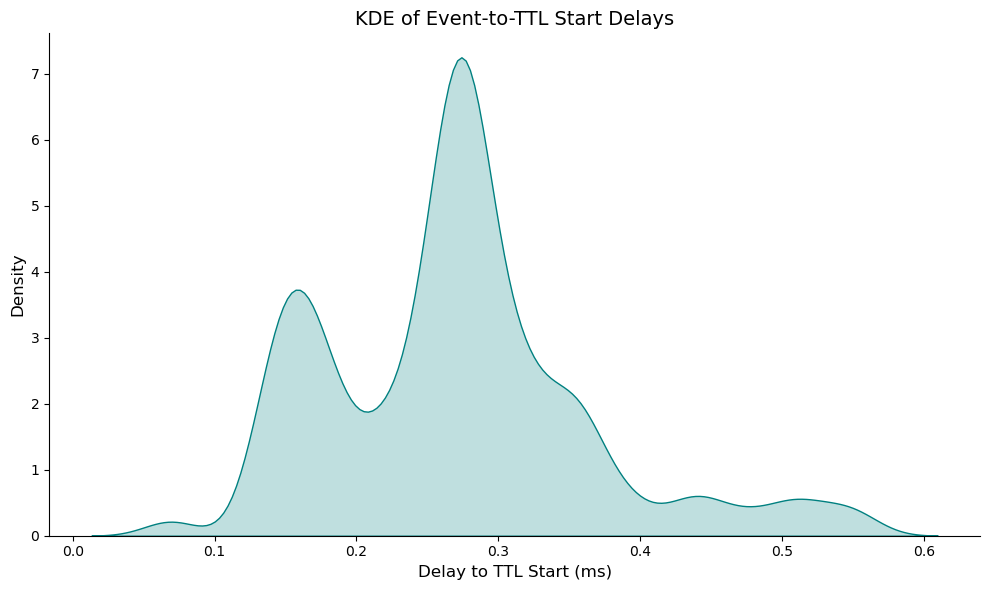

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load  file
df = pd.read_csv('../../source/SPEED_TEST_RESULTS/Pi_TTL_SPEED_TEST_CLEANED.csv')

# Convert to milliseconds 
df["Delay_ms"] = df["Delay_to_TTL_Start_sec"] * 1000

# Plot KDE only (no histogram, no grid)
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="Delay_ms",
    bw_adjust=0.5,
    fill=True,
    color="teal"
)
sns.despine(top=True, right=True)

plt.title("KDE of Event-to-TTL Start Delays", fontsize=14)
plt.xlabel("Delay to TTL Start (ms)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

plt.tight_layout()
plt.show()


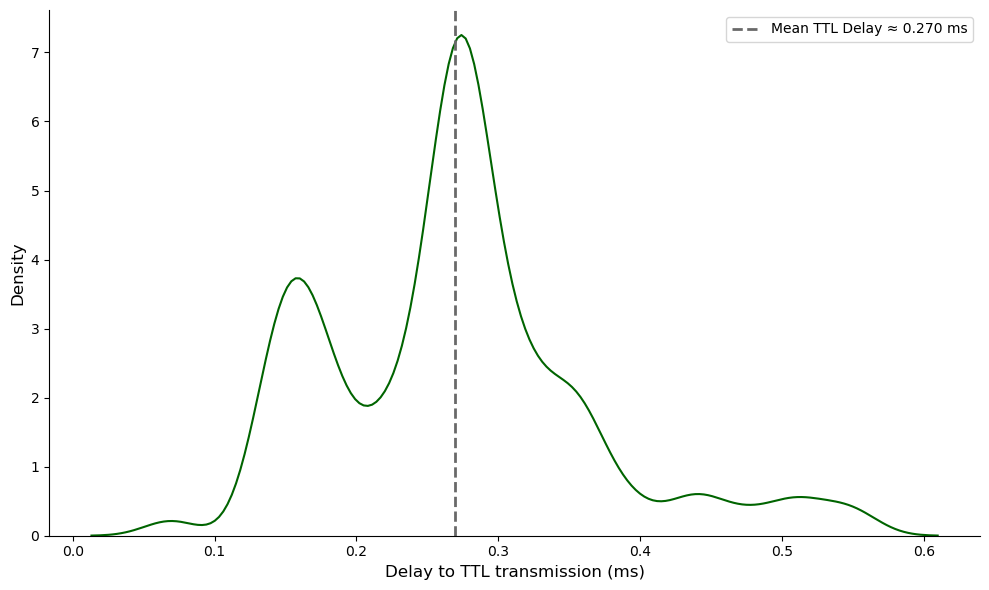

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../../source/SPEED_TEST_RESULTS/Pi_TTL_SPEED_TEST_CLEANED.csv')
df["Delay_ms"] = df["Delay_to_TTL_Start_sec"] * 1000

# Load port summary file and calculate global mean delay
summary = pd.read_csv('../../source/SPEED_TEST_RESULTS/Pi_TTL_Timing_Summary_Per_Port.csv')
mean_delay_sec = summary["Mean_Delay"].mean()
mean_delay_ms = mean_delay_sec * 1000

# Plot KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="Delay_ms",
    bw_adjust=0.5,
    fill=False,
    color="darkgreen"
)

# Add dashed line at mean
plt.axvline(x=mean_delay_ms, color='dimgray', linestyle='--', linewidth=2,
            label=f'Mean TTL Delay ≈ {mean_delay_ms:.3f} ms')

# Aesthetics
plt.title("", fontsize=14)
plt.xlabel("Delay to TTL transmission (ms)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()
